# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from datetime import datetime, timezone
from dotenv import load_dotenv
import os


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Import the OpenWeatherMap API key
load_dotenv()
weather_api_key = os.getenv("weather_api_key")

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ivdel'
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | nova sintra
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | sooke
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | toppenish
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | aral
Processing Record 17 of Set 1 | toledo
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | aykhal
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 1 | puerto ayo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ivdel',60.6911,60.4206,12.87,95,20,1.15,RU,1722369765
1,laguna,38.4210,-121.4238,31.76,47,0,2.57,US,1722369767
2,nova sintra,14.8667,-24.7167,25.00,78,100,5.44,CV,1722369768
3,avarua,-21.2078,-159.7750,21.03,56,75,3.09,CK,1722369769
4,tura,25.5198,90.2201,24.84,94,91,1.82,IN,1722369770


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ivdel',60.6911,60.4206,12.87,95,20,1.15,RU,1722369765
1,laguna,38.4210,-121.4238,31.76,47,0,2.57,US,1722369767
2,nova sintra,14.8667,-24.7167,25.00,78,100,5.44,CV,1722369768
3,avarua,-21.2078,-159.7750,21.03,56,75,3.09,CK,1722369769
4,tura,25.5198,90.2201,24.84,94,91,1.82,IN,1722369770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

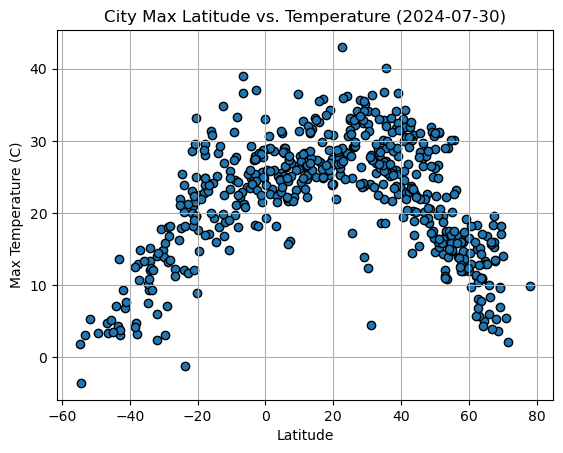

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties

# Convert Unix time to YYYY-MM-DD format for today's date
today_unix_time = city_data_df['Date'].iloc[0]
today_date = datetime.fromtimestamp(today_unix_time, tz=timezone.utc).strftime('%Y-%m-%d')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

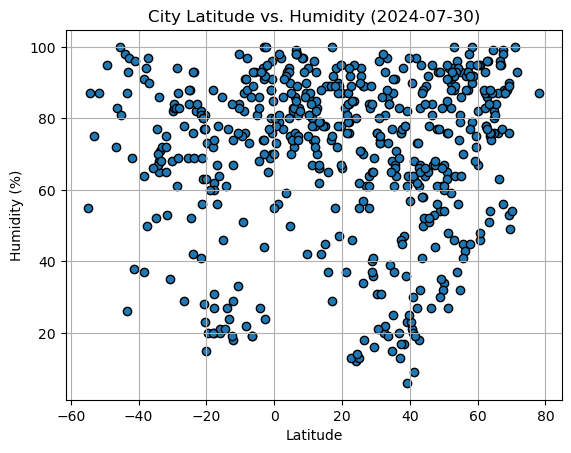

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties

# Convert Unix time to YYYY-MM-DD format for today's date
today_unix_time = city_data_df['Date'].iloc[0]
today_date = datetime.fromtimestamp(today_unix_time, tz=timezone.utc).strftime('%Y-%m-%d')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

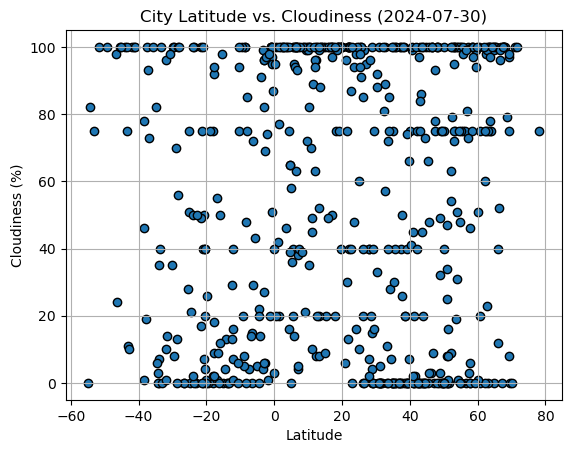

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties

# Convert Unix time to YYYY-MM-DD format for today's date
today_unix_time = city_data_df['Date'].iloc[0]
today_date = datetime.fromtimestamp(today_unix_time, tz=timezone.utc).strftime('%Y-%m-%d')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

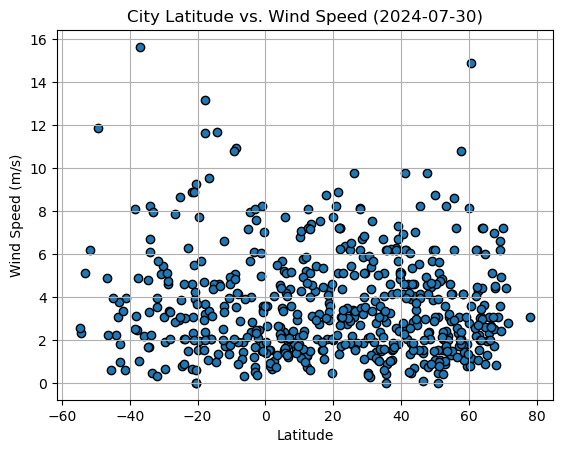

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties

# Convert Unix time to YYYY-MM-DD format for today's date
today_unix_time = city_data_df['Date'].iloc[0]
today_date = datetime.fromtimestamp(today_unix_time, tz=timezone.utc).strftime('%Y-%m-%d')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * np.array(x_values) + intercept
    
    # Output R-squared value to the terminal
    r_squared = r_value**2
    print(f'The r^2 value is: {r_squared:}')
    
    # Create scatter plot
    plt.scatter(x_values, y_values, label='Data Points')
    
    # Plot regression line in red
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')
    
    # Add the regression equation to the plot in red
    plt.annotate(f'$y = {slope:.2f}x + {intercept:.2f}$', 
                 xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 verticalalignment='top', horizontalalignment='left')
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ivdel',60.6911,60.4206,12.87,95,20,1.15,RU,1722369765
1,laguna,38.4210,-121.4238,31.76,47,0,2.57,US,1722369767
2,nova sintra,14.8667,-24.7167,25.00,78,100,5.44,CV,1722369768
4,tura,25.5198,90.2201,24.84,94,91,1.82,IN,1722369770
9,sooke,48.3746,-123.7276,18.65,93,100,2.36,CA,1722369776


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,avarua,-21.2078,-159.7750,21.03,56,75,3.09,CK,1722369769
5,port elizabeth,-33.9180,25.5701,13.39,68,0,8.23,ZA,1722369771
6,blackmans bay,-43.0167,147.3167,3.07,93,11,1.83,AU,1722369707
7,waitangi,-43.9535,-176.5597,7.12,98,100,2.24,NZ,1722369713
8,codrington,-38.2667,141.9667,4.69,91,78,3.10,AU,1722369775


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.375618706329571


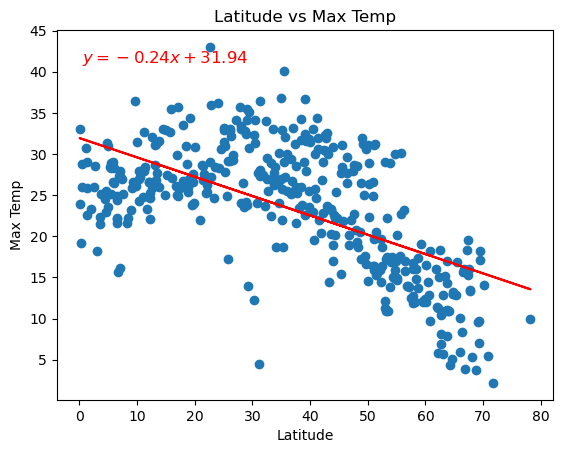

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', "Latitude vs Max Temp")


The r^2 value is: 0.6475748726167779


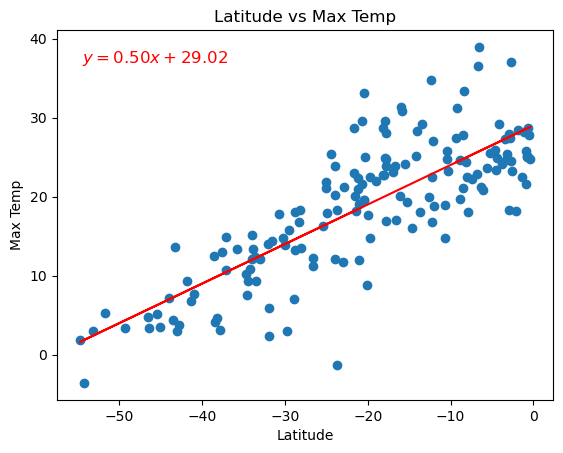

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', "Latitude vs Max Temp")

**Discussion about the linear relationship:** 


The relationship between latitude and maximum temperature varies between the hemispheres. In the Southern Hemisphere, there is a noticeable trend where temperatures increase as the latitude moves closer to the equator. This trend is relatively strong, suggesting that latitude is a good predictor of temperature. On the other hand, in the Northern Hemisphere, temperatures tend to decrease as latitude increases. This trend is not as strong as in the Southern Hemisphere, indicating that latitude is a less reliable predictor of temperature in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.0004368027648332045


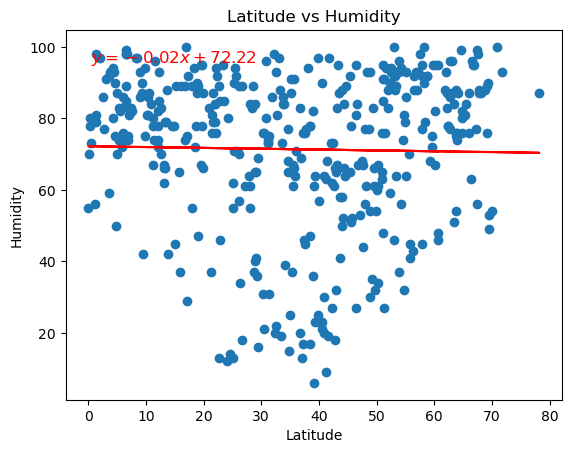

In [17]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', "Latitude vs Humidity")

The r^2 value is: 0.002895708436899009


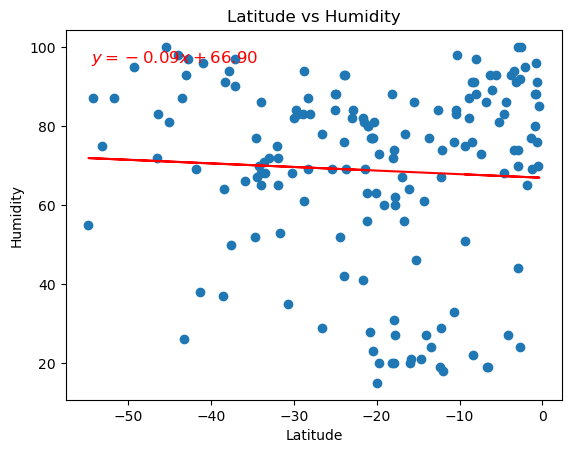

In [18]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', "Latitude vs Humidity")

**Discussion about the linear relationship:**


The scatter plots showing the relationship between latitude and humidity in both hemispheres indicate very weak correlations. In the Northern Hemisphere, there is a slight increase in humidity with increasing latitude, while in the Southern Hemisphere, there is a slight decrease. However, the minimal slopes and the scattered data points suggest that latitude is not a significant predictor of humidity levels in either hemisphere. Other factors are likely to play more substantial roles in determining humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.005707286119807123


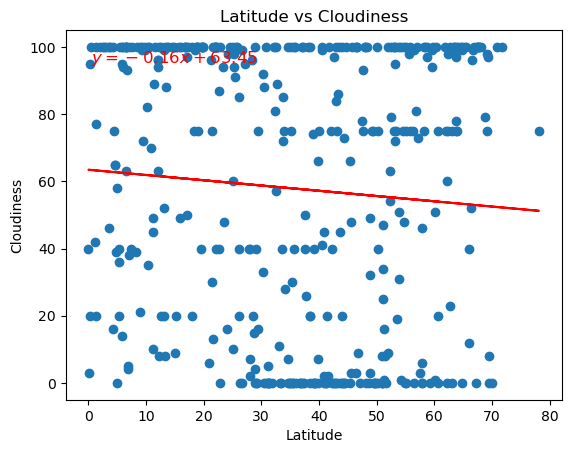

In [19]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', "Latitude vs Cloudiness")

The r^2 value is: 0.009371395024698132


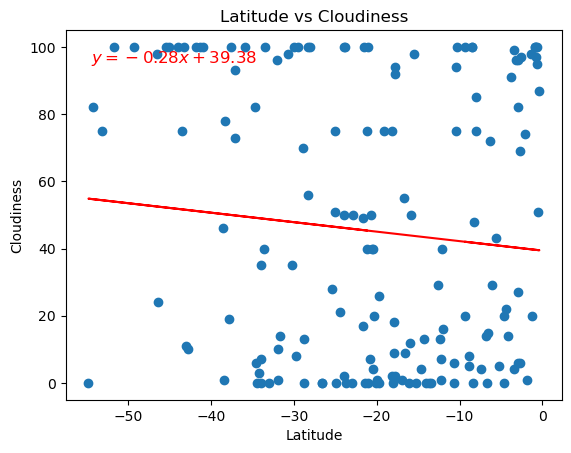

In [20]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', "Latitude vs Cloudiness")

**Discussion about the linear relationship:**


The relationship between latitude and cloudiness in both the Northern and Southern Hemispheres shows a very weak negative correlation. In the Northern Hemisphere, cloudiness slightly decreases as latitude increases, but the correlation is very weak. Similarly, in the Southern Hemisphere, there is also a slight decrease in cloudiness with increasing latitude. However, the weak correlations in both hemispheres suggest that latitude is not a significant predictor of cloudiness, and other factors likely have a more substantial impact on cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0007452206779526981


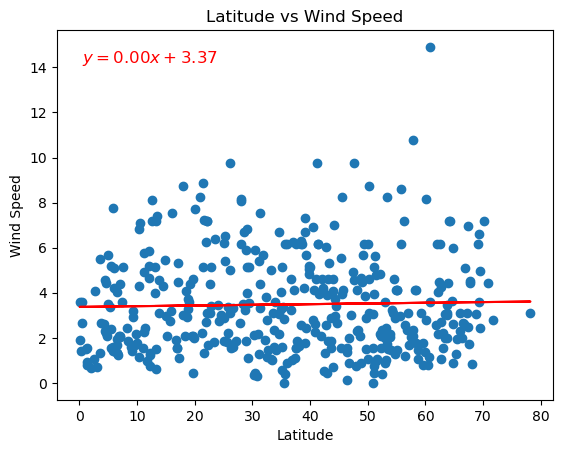

In [21]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', "Latitude vs Wind Speed")

The r^2 value is: 0.0008743164388727478


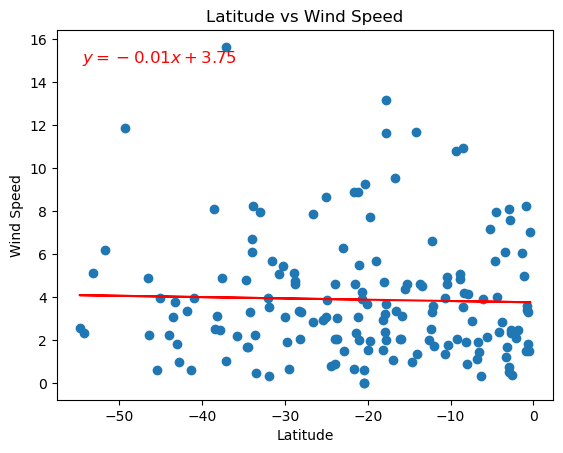

In [22]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', "Latitude vs Wind Speed")

**Discussion about the linear relationship:**



The relationship between latitude and wind speed in both hemispheres shows a weak negative correlation, as indicated by linear regression analyses. In the Northern Hemisphere, there is a slight decrease in wind speed with increasing latitude. Similarly, in the Southern Hemisphere, wind speed also slightly decreases as latitude increases. Despite these observed trends, the weak correlations imply that latitude is not a significant predictor of wind speed, and other environmental factors likely have a more substantial influence on wind speed variations.